In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
train_df = pd.read_csv(r"C:\Users\Arush\Downloads\train.csv")
test_df =  pd.read_csv(r"C:\Users\Arush\Downloads\test.csv")
test_passengerId = test_df["PassengerId"]

In [13]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
def bar_chart_func(dataset, feature, stacked = True):
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ["Passengers Survived", "Passengers Died"]
    ax = df_survived_dead.plot(kind = "bar", stacked = stacked, figsize = (7,7))

In [21]:
train_df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [22]:
train_df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

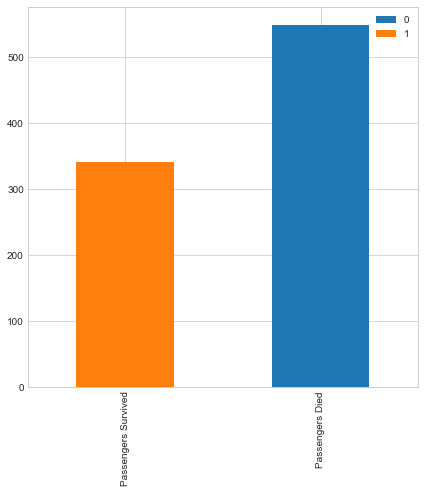

In [23]:
bar_chart_func(train_df,"Survived")

In [32]:
train_df("Sex").value_counts().to_frame()

TypeError: 'DataFrame' object is not callable

In [34]:
train_df.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

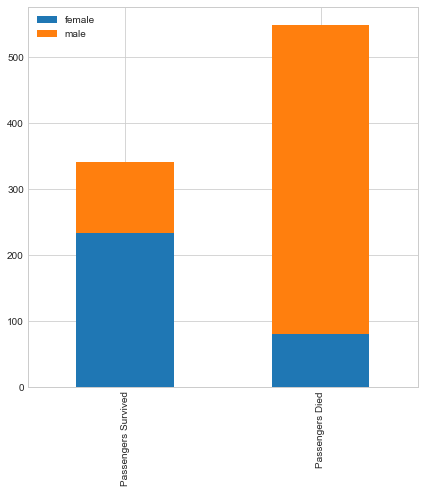

In [35]:
bar_chart_func(train_df,"Sex")

In [36]:
train_df.groupby(["Pclass"]).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


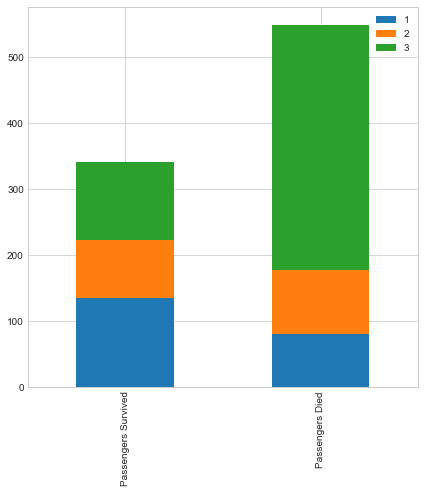

In [37]:
bar_chart_func(train_df,"Pclass")

In [49]:
def bar_chart_compare(dataset, feature1, feature2 = None):
    plt.figure(figsize = [7,7])
    plt.title("Survival rate by sex and class")
    g = sns.barplot(x = feature1, y = "Survived", hue = feature2, ci = None, data = dataset).set_ylabel("Survival Rate")

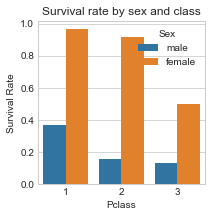

In [48]:
bar_chart_compare(train_df, "Pclass", "Sex")